# DATAWHALE Task 01 赛题理解

**一、赛题数据**

赛题来源自Google街景图像中的门牌号数据集（The Street View House Numbers Dataset, SVHN），并根据一定方式采样得到比赛数据集。

数据集报名后可见并可下载，该数据来自真实场景的门牌号。训练集数据包括3W张照片，验证集数据包括1W张照片，每张照片包括颜色图像和对应的编码类别和具体位置；为了保证比赛的公平性，测试集A包括4W张照片，测试集B包括4W张照片。

样本如图所示：

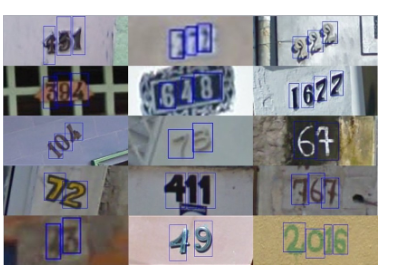


所有的数据（训练集、验证集和测试集）的标注使用JSON格式，并使用文件名进行索引。如果一个文件中包括多个字符，则使用列表将字段进行组合。

Field | Description
------|------------
top  | 左上角坐标X
height | 字符高度
left | 左上角坐标Y
width |字符宽度
label | 字符编码

大体如下图所示（图像像素的坐标系与我们日常接触的坐标系略有区别）
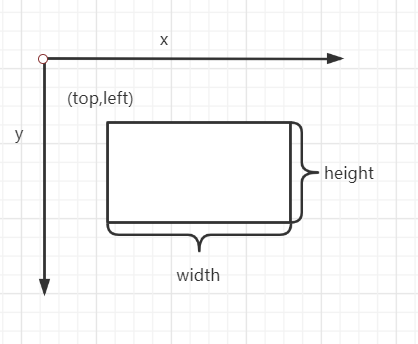


**二、评判标准**

$$
score = \frac{编码识别正确的数量}{测试集图片数量}
$$
**注意：**在一副图片中包含多个数字，比如123，必须全部识别正确才算正确，不能根据单个数字进行判别

**三、结果提交**
提交后缀名为.csv的文件，确保预测结果的格式与sample.csv的格式一致

file_name , file_code

XXX.jpg , XXX

**四、数据读取**

sample code for loading data


In [1]:
import json
train_json = json.load(open('../input/train.json'))
"""
json.loads()和json.load()的区别
json.loads()的参数是string
用法：
with open("json_data.json", "r") as content:
  print(json.loads(content.read()))
  
json.load()的参数是文件路径
用法：
with open("json_data.json", "r") as content:
  print(json.loads(content))
或者
train_json = json.load(open('json_data,json'))

"""

def parse_json(d):
   arr = np.array([
       d['top'], d['height'], d['left'],  d['width'], d['label']
   ])
   arr = arr.astype(int)
   return arr

img = cv2.imread('../input/train/000000.png')
arr = parse_json(train_json['000000.png'])

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):
   plt.subplot(1, arr.shape[1]+1, idx+2)
   plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
   plt.title(arr[4, idx])
   plt.xticks([]); plt.yticks([])

FileNotFoundError: [Errno 2] No such file or directory: '../input/train.json'

**五、解题思路**
在实际应用中，识别流程分为两部分。一、要保证检测到对应的数字。二、正确识别对应的数字并输出

本次赛题为了降低难度，已经给出了对应数字的坐标。所以第一步并不需要，但是需要知道知道一些目标检测的模型，比如yolo和SSD